In [4]:
import hypernetx as hnx

def to_array_of_arrays(hg_dict: dict) -> list[list[str]]:
    return [edge["vertices"] for edge in hg_dict.get("hypergraph", [])]

Status: 500
{'error': "Hypergraph.toplexes() got an unexpected keyword argument 'return_hyp'",
 'trace': "TypeError: Hypergraph.toplexes() got an unexpected keyword argument 'return_hyp'"}


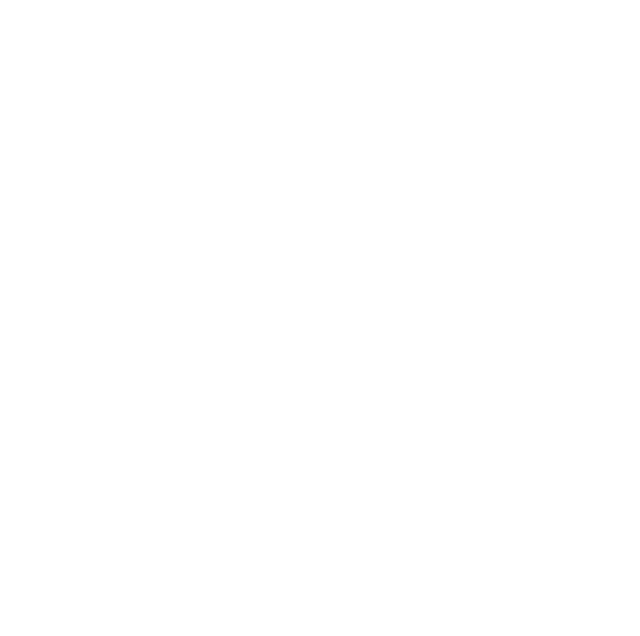

In [16]:
import requests
from pprint import pprint

url = "http://127.0.0.1:8000/evolve"

payload = {
    "hypergraph": [
        {"vertices": ["A", "B"]}
    ],
    "rule": {
        "L": [
            {"vertices": ["x", "y"]}
        ],
        "I": [
            {"vertices": ["x", "y"]}
        ],
        "R": [
            {"vertices": ["x", "y"]},
            {"vertices": ["x", "m1"]}, 
            {"vertices": ["m1", "m2"]},
            {"vertices": ["m2", "y"]}, 
            {"vertices": ["m1", "u"]}, 
            {"vertices": ["m2", "v"]}, 
            {"vertices": ["u"]},       
            {"vertices": ["v"]}      
        ]
    },
    "steps": 1,    
    "clean": True
}

resp = requests.post(url, json=payload)
print("Status:", resp.status_code)
pprint(resp.json(), width=120)
hnx.draw(hnx.Hypergraph(to_array_of_arrays(resp.json())))

In [ ]:
## TODO сравни то что выдает это и такая же функция без api